#### import pandas as pd
from sklearn import set_config
set_config(transform_output='pandas')

# Full path to your CSV
file_path = '/Users/asliozdemirstrollo/Documents/Documents/Time Series/Clean Skies London/air-quality-london-monthly-averages.csv'

# Create a Pandas DataFrame from the CSV data
df = pd.read_csv(file_path)

# Show first rows
print(df.head())

In [70]:
import seaborn as sns
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from typing import Any

In [71]:
# Converting the Month column to a datetime format

df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)
df = df.sort_index()

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2008-01-01 to 2019-08-01
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   London Mean Roadside:Nitric Oxide (ug/m3)          115 non-null    float64
 1   London Mean Roadside:Nitrogen Dioxide (ug/m3)      139 non-null    float64
 2   London Mean Roadside:Oxides of Nitrogen (ug/m3)    115 non-null    float64
 3   London Mean Roadside:Ozone (ug/m3)                 139 non-null    float64
 4   London Mean Roadside:PM10 Particulate (ug/m3)      139 non-null    float64
 5   London Mean Roadside:PM2.5 Particulate (ug/m3)     139 non-null    float64
 6   London Mean Roadside:Sulphur Dioxide (ug/m3)       139 non-null    float64
 7   London Mean Background:Nitric Oxide (ug/m3)        115 non-null    float64
 8   London Mean Background:Nitrogen Dioxide (ug/m3)    139 non-null    floa

In [72]:
# keep this column
df = df[['London Mean Roadside:Nitrogen Dioxide (ug/m3)']].rename(
    columns={'London Mean Roadside:Nitrogen Dioxide (ug/m3)': 'NO2_ug_m3'}
)

#### import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['NO2_ug_m3'], color='tab:blue', linewidth=2)
plt.title('London Mean Roadside NO₂ (µg/m³) - Monthly Averages', fontsize=14)
plt.xlabel('Month')
plt.ylabel('NO₂ concentration (µg/m³)')
plt.grid(True)
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from typing import Any

# Perform the ADF test on the 'Adj Close' column
result: Any = adfuller(df["NO2_ug_m3"])

# Print the ADF statistic and the p-value
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])

# Print the critical values for different confidence levels
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.3f}")

ADF Statistic: 0.017365
p-value: 0.959945
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


In [75]:
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary and requires differencing.")

The time series is non-stationary and requires differencing.


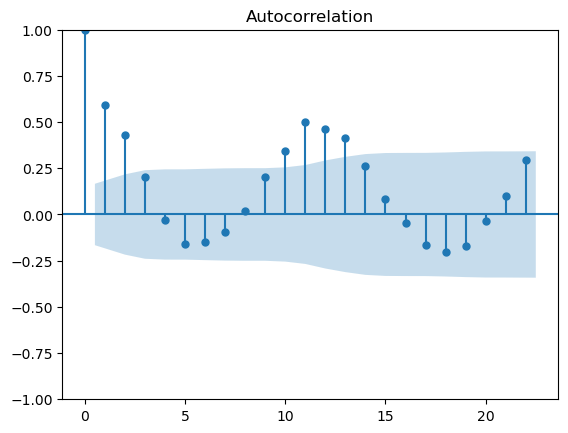

In [76]:
plot_acf(df['NO2_ug_m3']);

In [77]:
df = df.copy()
df['NO2_ug_m3_diff'] = df['NO2_ug_m3'].diff()
df = df.dropna()

<Axes: title={'center': 'Original vs Differenced NO₂'}, xlabel='Month'>

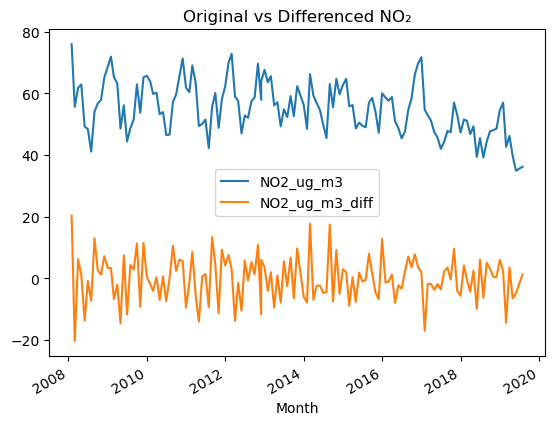

In [78]:
diff_df = df.copy()

df.plot(title='Original vs Differenced NO₂')

In [109]:
df

,NO2_ug_m3,NO2_ug_m3_diff
Month,,
2008-02-01,75.9,20.4
2008-03-01,55.6,-20.3
2008-04-01,61.8,6.2
2008-05-01,62.9,1.1
2008-06-01,49.2,-13.7
...,...,...
2019-03-01,42.6,-14.4
2019-04-01,46.2,3.6
2019-05-01,39.7,-6.5


In [79]:
# Perform the ADF test on the differenced data
result = adfuller(df['NO2_ug_m3_diff'])

# Print the ADF statistic and the p-value after differencing
print('ADF Statistic after differencing: %f' % result[0])
print('p-value after differencing: %f' % result[1])

# Print the critical values after differencing
print('Critical Values after differencing:')
for key, value in result[4].items():
    print(f"\t{key}: {value:.3f}")

ADF Statistic after differencing: -9.347371
p-value after differencing: 0.000000
Critical Values after differencing:
	1%: -3.483
	5%: -2.884
	10%: -2.579


#### plot_acf(df['NO2_ug_m3_diff']);

In [81]:
# Split the Data:

In [83]:
# Extract the column as a separate Series
diff_df = df.copy()                         
train = diff_df[:int(len(diff_df)*0.9)]
test  = diff_df[int(len(diff_df)*0.9):]

print("Train length:", len(train))
print("Test length:", len(test))

Train length: 124
Test length: 14


In [84]:
# Create a Moving Average Forecast:

In [85]:
# Experiment with different window sizes.
# Plot the predictions alongside the true values and compare their performance.


In [86]:
def moving_average_forecast(
    train_series: pd.Series,
    test_series: pd.Series,
    window_size: int
) -> list[float]:
    # Convert the training series into a list to maintain a history of observations
    history = list(train_series)
    # Initialise an empty list to store the forecasted values
    predictions: list[float] = []

    # Loop over each time point in the test series
    for t in range(len(test_series)):

        # Calculate the average of the last 'window_size' observations
        window = history[-window_size:]
        yhat = sum(window) / window_size

        # Append the forecasted value to the predictions list
        predictions.append(yhat)

        # Simulate new data rolling in by adding the next test value to 'history'
        history.append(test_series.iloc[t])

    # Return the list of forecasted values
    return predictions

In [87]:
# Forecasting with Different Window Sizes

In [88]:
window_size: int = 5

predictions_ma5: list[float] = moving_average_forecast(train['NO2_ug_m3'],
                                                       test['NO2_ug_m3'],
                                                       window_size)

In [ ]:
# Let's visualise our predictions.

<Axes: xlabel='Month', ylabel='NO2_ug_m3'>

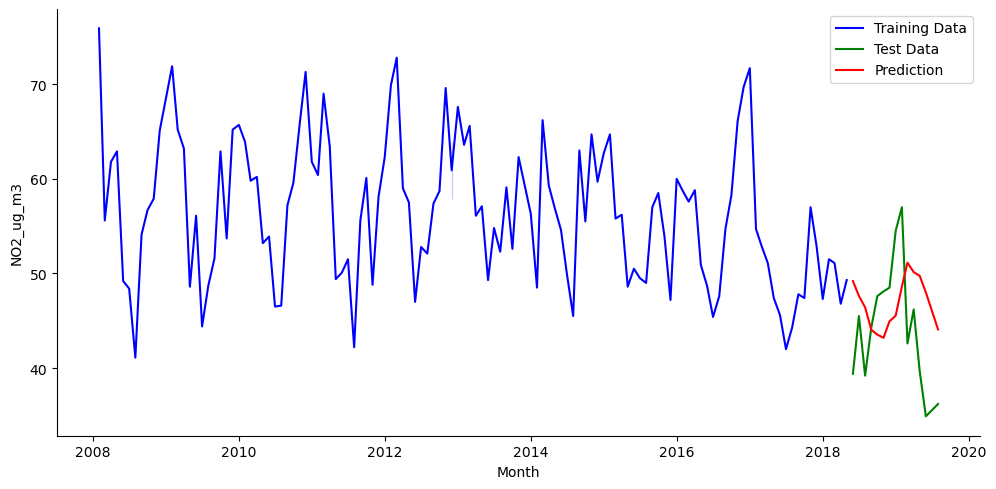

In [90]:
# Plot the Train Data
g: sns.FacetGrid = sns.relplot(kind='line',
                               data=train,
                               x=train.index,
                               y='NO2_ug_m3',
                               color='blue',
                               label='Training Data',
                               aspect=2)

# Plot the Test Data on the same axis
sns.lineplot(data=test,
             x=test.index,
             y='NO2_ug_m3',
             color='green',
             label='Test Data',
             ax=g.ax)

# Plot the Predictions on the same axis
sns.lineplot(data=test,
             x=test.index,
             y=predictions_ma5,
             color='red',
             label='Prediction',
             ax=g.ax)



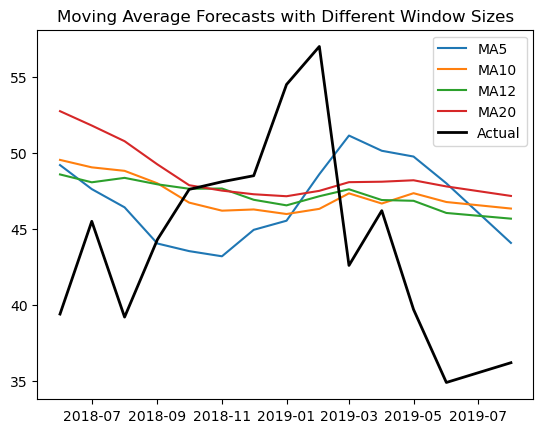

In [91]:
for w in [5, 10, 12, 20]:
    preds = moving_average_forecast(train['NO2_ug_m3'], test['NO2_ug_m3'], w)
    plt.plot(test.index, preds, label=f'MA{w}')
plt.plot(test['NO2_ug_m3'], label='Actual', color='black', linewidth=2)
plt.legend()
plt.title("Moving Average Forecasts with Different Window Sizes")
plt.show()

In [92]:
from sklearn.metrics import mean_squared_error
import numpy as np

for w in [5, 10, 12, 20]:
    preds = moving_average_forecast(train['NO2_ug_m3'], test['NO2_ug_m3'], w)
    rmse = np.sqrt(mean_squared_error(test['NO2_ug_m3'], preds))
    print(f"MA{w}: RMSE = {rmse:.2f}")

MA5: RMSE = 7.46
MA10: RMSE = 7.28
MA12: RMSE = 6.77
MA20: RMSE = 8.08


In [93]:
def plot_predictions(predictions: list[float], window_size: int) -> None:
    g = sns.relplot(kind='line',
                    data=test,
                    x=test.index,
                    y='NO2_ug_m3',
                    color='green',
                    label='Test Data',
                    aspect=2)

    sns.lineplot(data=test,
                 x=test.index,
                 y=predictions,
                 color='red',
                 label='Prediction',
                 ax=g.ax)

    g.set_axis_labels("Date", "NO₂ (µg/m³)")
    g.set(title=f"NO₂ Concentration with MA{window_size} Forecast")

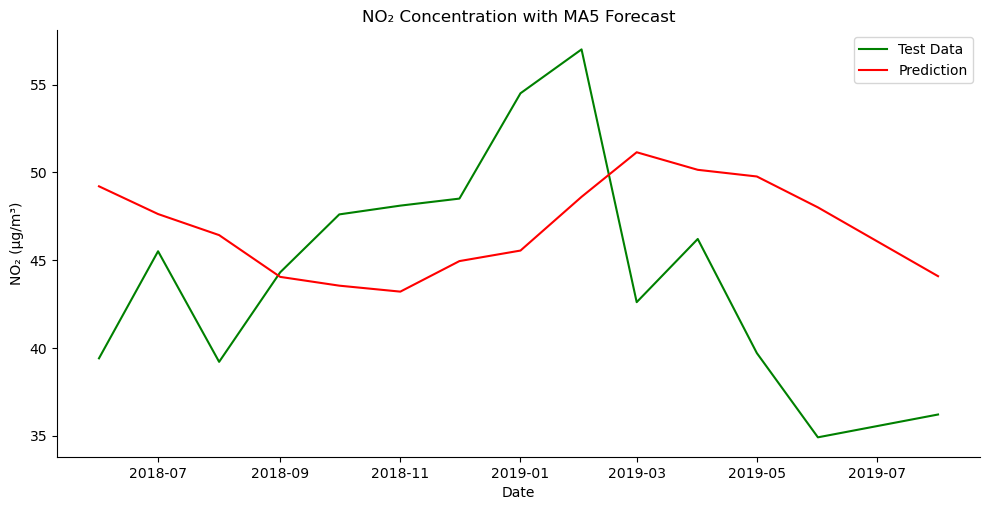

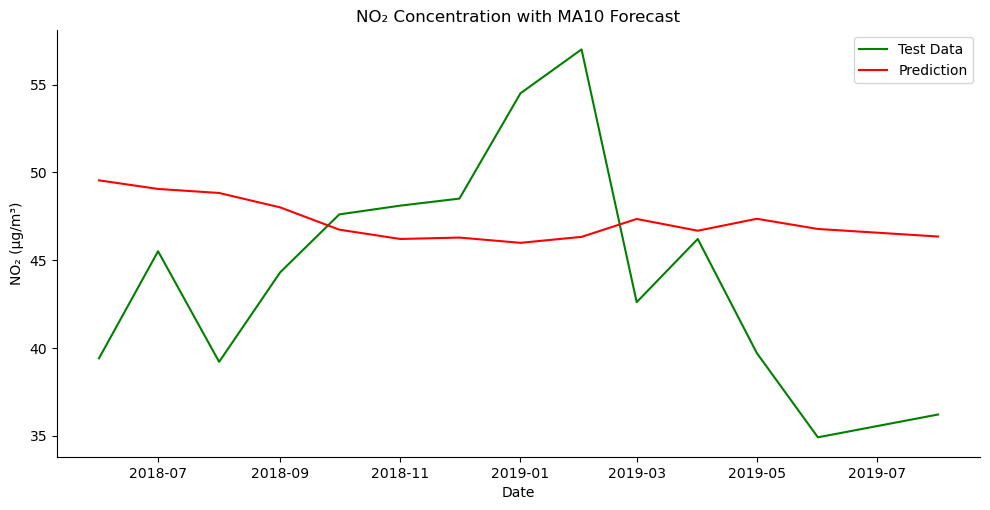

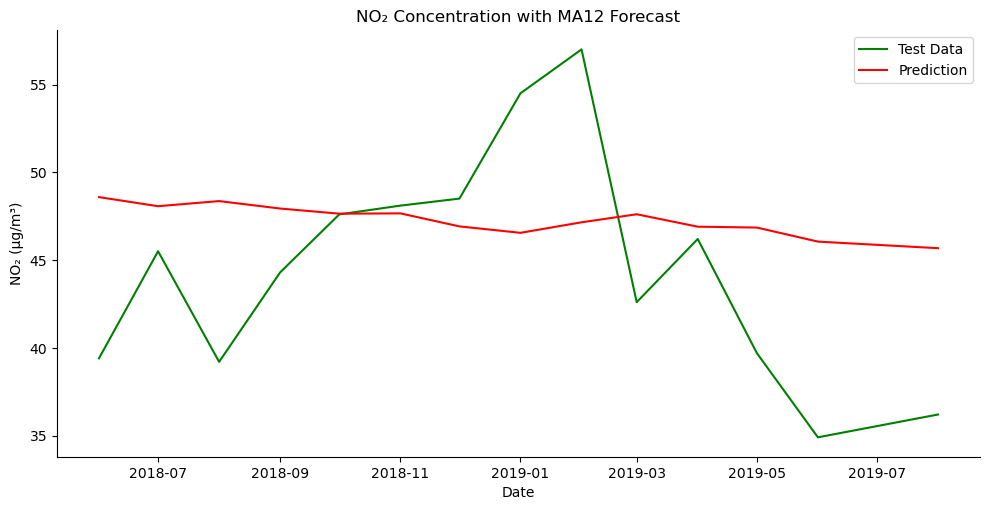

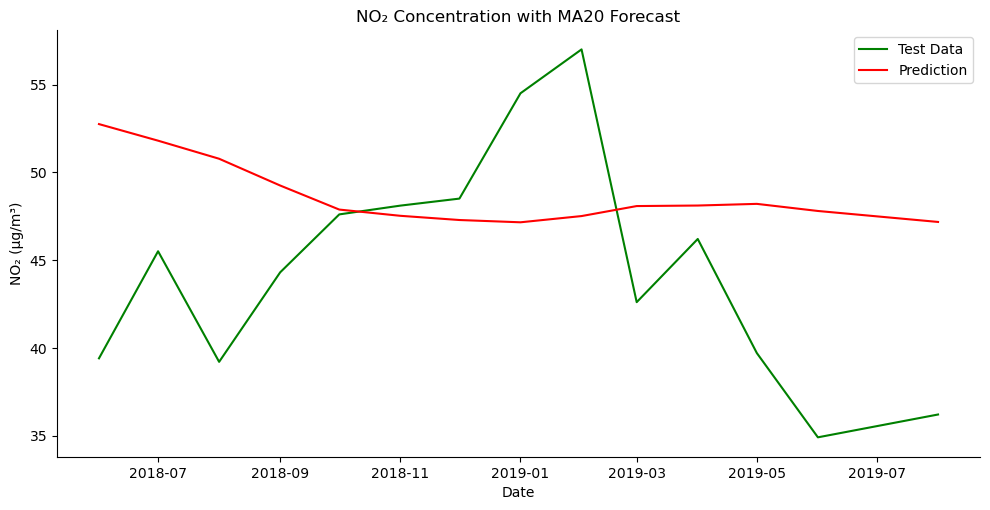

In [94]:
for w in [5, 10, 12, 20]:
    preds = moving_average_forecast(train['NO2_ug_m3'], test['NO2_ug_m3'], w)
    plot_predictions(preds, w)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

def evaluate_forecast(
    predictions: list[float],
    window_size: int
) -> dict[str, float]:

    mae = mean_absolute_error(test['NO2_ug_m3'], predictions)
    rmse = root_mean_squared_error(test['NO2_ug_m3'], predictions)
    mape = mean_absolute_percentage_error(test['NO2_ug_m3'], predictions)

    print(f"""Evaluation Metrics for Moving Average Forecast (Window Size = {window_size}):
    \t Mean Absolute Error (MAE): {mae:.2f}
    \t Root Mean Squared Error (RMSE): {rmse:.2f}
    \t Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%""")

    return {'mae': mae, 'rmse': rmse, 'mape': mape}

In [97]:
ma5_evaluation: dict[str, float | int] = evaluate_forecast(predictions_ma5, window_size)

Evaluation Metrics for Moving Average Forecast (Window Size = 5):
    	 Mean Absolute Error (MAE): 6.63
    	 Root Mean Squared Error (RMSE): 7.46
    	 Mean Absolute Percentage Error (MAPE): 15.64%


In [98]:
results_data: dict[str, str | float] = {
    'Model': 'Moving Average (5)',
    'MAE': ma5_evaluation["mae"],
    'RMSE': ma5_evaluation["rmse"],
    'MAPE': ma5_evaluation["mape"]
}

results_df: pd.DataFrame = pd.DataFrame([results_data])

results_df

,Model,MAE,RMSE,MAPE
0,Moving Average (5),6.628571,7.46469,0.156422


In [99]:
window_size: int = 10

predictions_ma10: list[float] = moving_average_forecast(train['NO2_ug_m3'],
                                                        test['NO2_ug_m3'],
                                                        window_size)

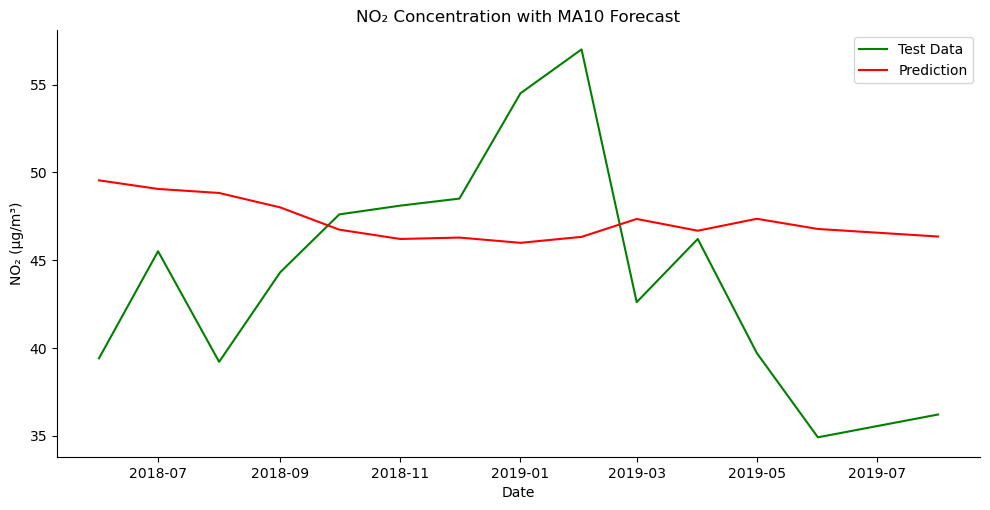

In [100]:
plot_predictions(predictions_ma10, 10)

In [101]:
evaluation_ma10: dict[str, float | int] = evaluate_forecast(predictions_ma10, 10)

Evaluation Metrics for Moving Average Forecast (Window Size = 10):
    	 Mean Absolute Error (MAE): 6.15
    	 Root Mean Squared Error (RMSE): 7.28
    	 Mean Absolute Percentage Error (MAPE): 14.61%


In [104]:
# Add the new row to your table
results_df = add_to_comparison_table(evaluation_ma10, 10)

# Display it
results_df

,Model,MAE,RMSE,MAPE
0,Moving Average (5),6.628571,7.46469,0.156422
1,Moving Average (10),6.147857,7.28272,0.146137


In [105]:
window_size: int = 20

predictions_ma20: list[float] = moving_average_forecast(train['NO2_ug_m3'],
                                                         test['NO2_ug_m3'],
                                                         window_size)

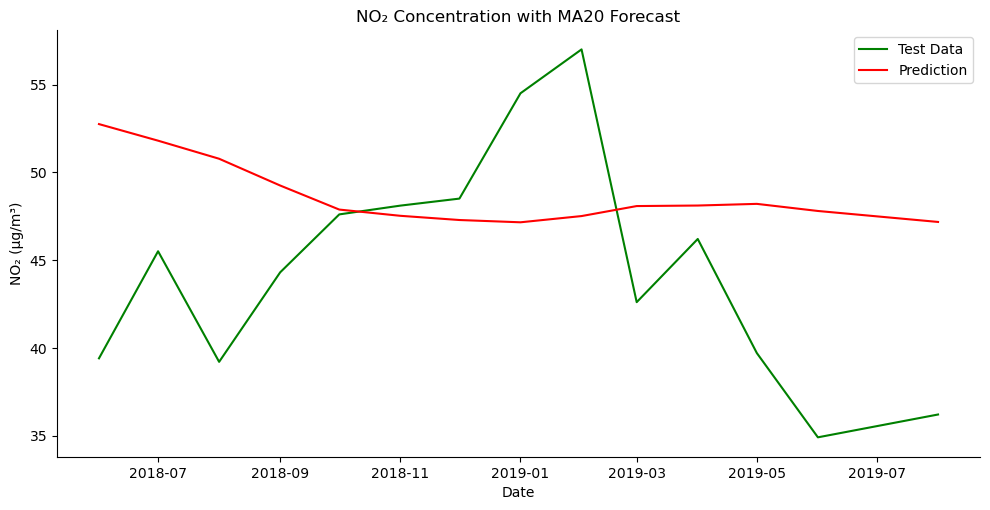

In [106]:
plot_predictions(predictions_ma20, 20)

In [107]:
evaluation_ma20: dict[str, float | int] = evaluate_forecast(predictions_ma20, 20)

Evaluation Metrics for Moving Average Forecast (Window Size = 20):
    	 Mean Absolute Error (MAE): 6.77
    	 Root Mean Squared Error (RMSE): 8.08
    	 Mean Absolute Percentage Error (MAPE): 16.32%


In [108]:
# Add the new row to your table
results_df = add_to_comparison_table(evaluation_ma20, 20)

# Display it
results_df

,Model,MAE,RMSE,MAPE
0,Moving Average (5),6.628571,7.464690,0.156422
1,Moving Average (10),6.147857,7.282720,0.146137
2,Moving Average (20),6.773214,8.082837,0.163197
